In [1]:
from datetime import datetime
import sys

sys.path.append("../")
from energyvslatconst.generate_graphene import generate_unit_cell
from energyvslatconst.relaxation_latconst import equilibrate_graphene

In [2]:
from ase import Atoms
from ase.build import bulk
from ase.calculators.kim import KIM
from ase.phonons import Phonons
from ase.visualize import view

import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("default")
potential = "DUNN_best_train"

In [3]:
# Graphene sheet
a = equilibrate_graphene(potential, 2.466)[0]
cell = a * np.array([[1, 0, 0], [0.5, np.sqrt(3) / 2, 0], [0, 0, 20]])
positions = np.array([cell[0], 1 / 3 * cell[0] + 1 / 3 * cell[1]])
atoms = Atoms("2C", positions=positions, cell=cell, pbc=[1, 1, 1])
# view(atoms.repeat((4, 4, 1)))

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.032e-08*i)
WARNING, 2 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.032e-08*i)
WARNING, 2 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 3.032e-08*i)
WARNING, 2 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 3.032e-08*i)
WARNING, 2 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 3.032e-08*i)
WARNING, 2 imaginary frequencies at q = ( 0.07,  0.00,  0.00) ; (omega_q = 3.032e-08*i)
WARNING, 2 imaginary frequencies at q = ( 0.08,  0.00,  0.00) ; (omega_q = 3.032e-08*i)
WARNING, 2 imaginary frequencies at q = ( 0.10,  0.00,  0.00) ; (omega_q = 3.032e-08*i)
WARNING, 2 imaginary frequencies at q = ( 0.11,  0.00,  0.00) ; (omega_q = 3.032e-08*i)
WARNING, 2 imaginary frequencies at q = ( 0.12,  0.00,  0.00) ; (omega_q = 3.032e-08*i)
WARNING, 2 imaginary frequencies at q = ( 0.14,  0.00,  0.00) ; (omega_q = 3.032e-08*i)
WARNING, 2 imaginary frequencies

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.810e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.103e-01*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 2.788e-01*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 3.175e-01*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 3.372e-01*i)
WARNING, 1 imaginary frequencies at q = ( 0.07,  0.00,  0.00) ; (omega_q = 3.419e-01*i)
WARNING, 1 imaginary frequencies at q = ( 0.08,  0.00,  0.00) ; (omega_q = 3.325e-01*i)
WARNING, 1 imaginary frequencies at q = ( 0.10,  0.00,  0.00) ; (omega_q = 3.087e-01*i)
WARNING, 1 imaginary frequencies at q = ( 0.11,  0.00,  0.00) ; (omega_q = 2.672e-01*i)
WARNING, 1 imaginary frequencies at q = ( 0.12,  0.00,  0.00) ; (omega_q = 1.984e-01*i)
WARNING, 1 imaginary frequencies at q = ( 0.12, -0.12,  0.00) ; (omega_q = 1.127e-01*i)
WARNING, 1 imaginary frequencies

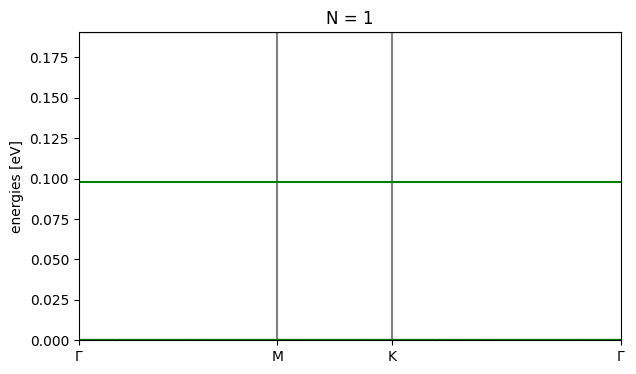

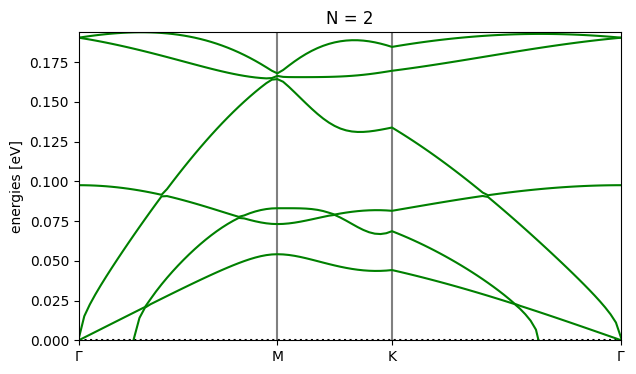

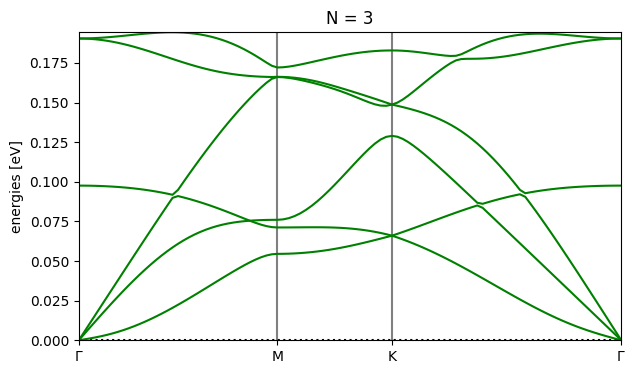

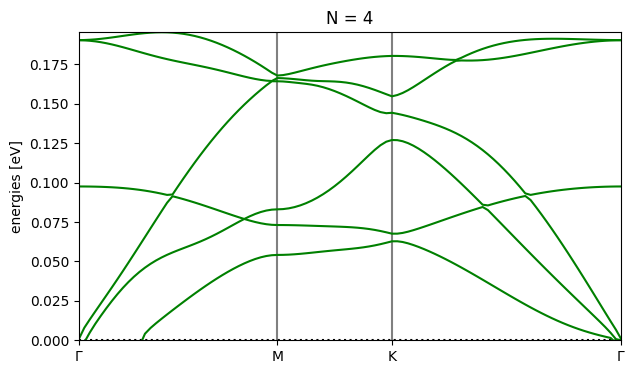

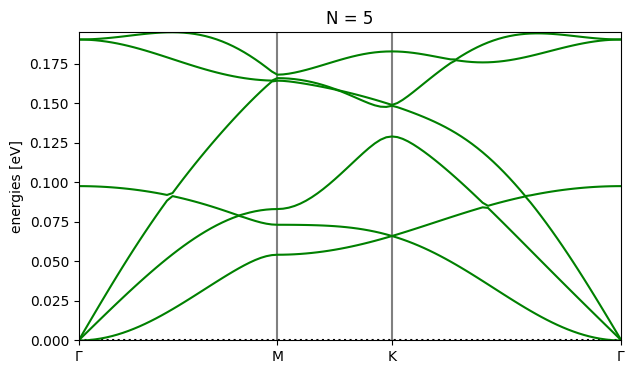

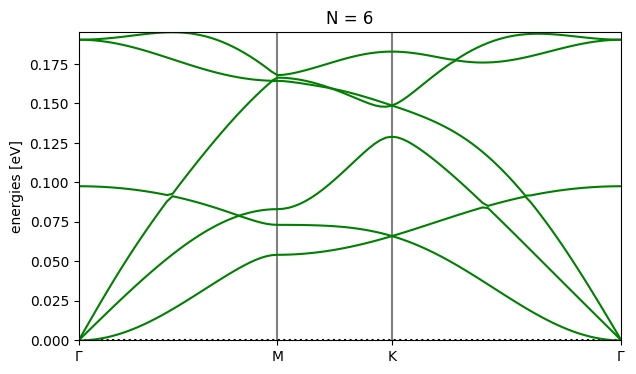

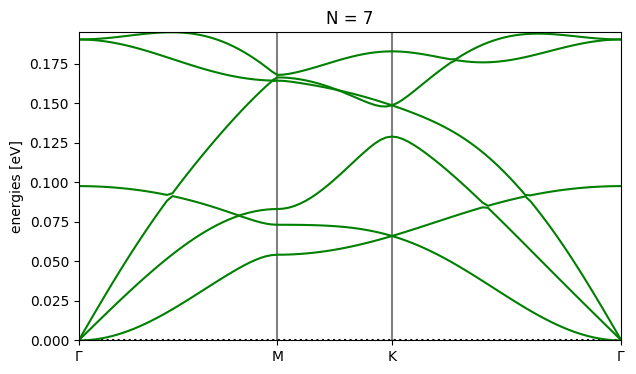

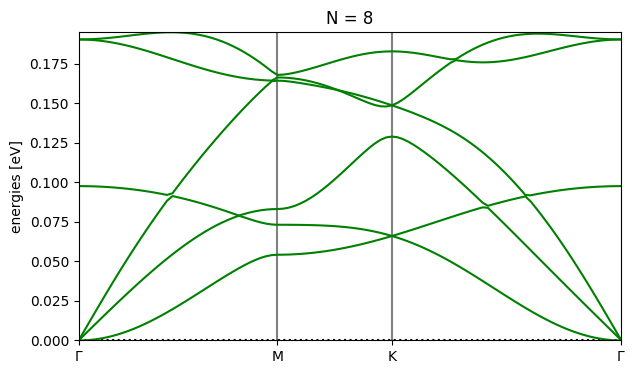

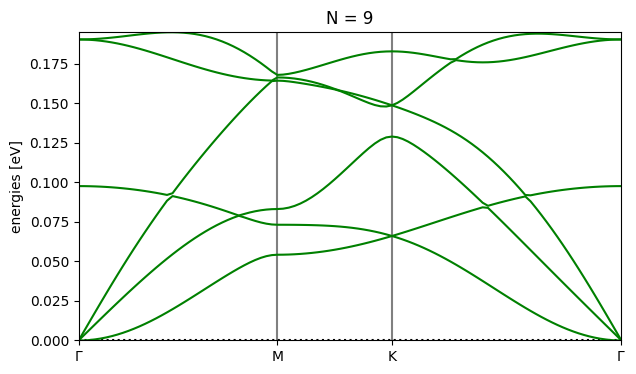

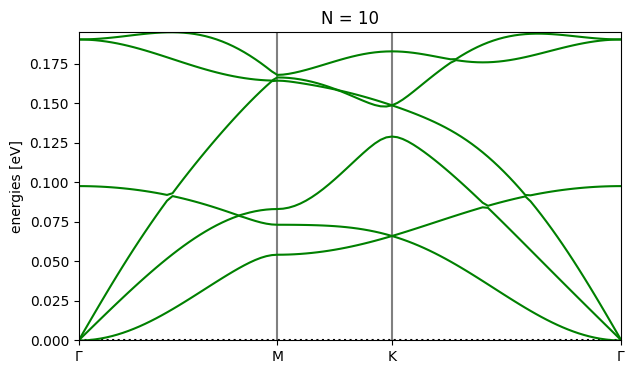

In [4]:
# hbar = 6.582119569e-16 * 1e12  # eV/THz
for N in range(1, 11):
    start_time = datetime.now()
    # Phonon calculator
    calc = KIM(potential)
    calc.set_parameters(active_member_id=[[0], [0]])
    ph = Phonons(atoms, calc, supercell=(N, N, 1), delta=0.01)
    ph.run()

    # Read forces and assemble the dynamical matrix
    ph.read(acoustic=True)
    ph.clean()

    path = atoms.cell.bandpath("GMKG", npoints=100)
    bs = ph.get_band_structure(path)
    # dos = ph.get_dos(kpts=(20, 20, 20)).sample_grid(npts=100, width=1e-3)
    end_time = datetime.now()
    print(f"N = {N}, Evaluation time:", end_time - start_time)

    # Plot the band structure and DOS:
    plt.figure(figsize=(7, 4))
    ax = plt.gca()
    ax.set_title(f"N = {N}")
    emax = np.max(bs.energies)
    bs.plot(ax=ax, emin=0.0, emax=emax)
plt.show()

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.098e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 1.519e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 1.498e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.098e-04*i)
delta = 0.01, Evaluation time: 0:00:13.599563
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.191e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 6.470e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 6.917e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.191e-04*i)
delta = 0.02, Evaluation time: 0:00:13.554782
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.278e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.278e-04*i)
delta = 0.03, Evaluation tim

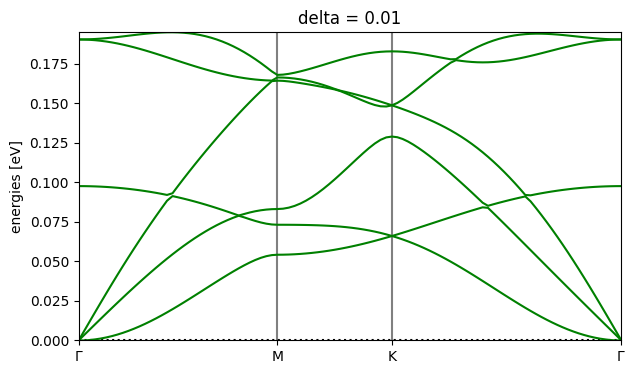

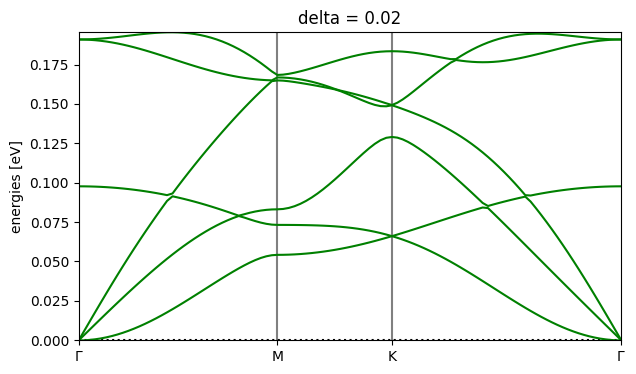

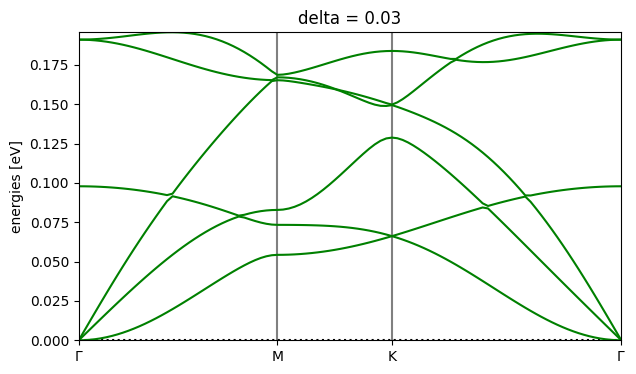

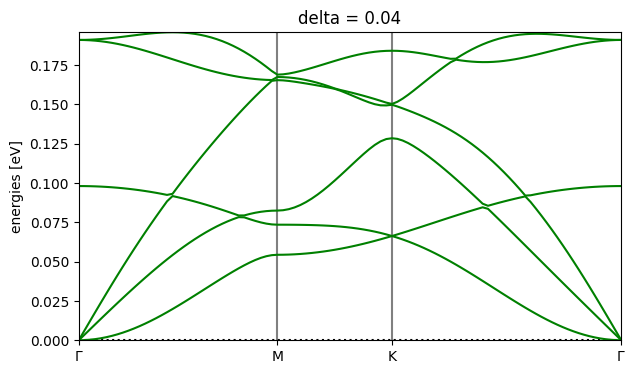

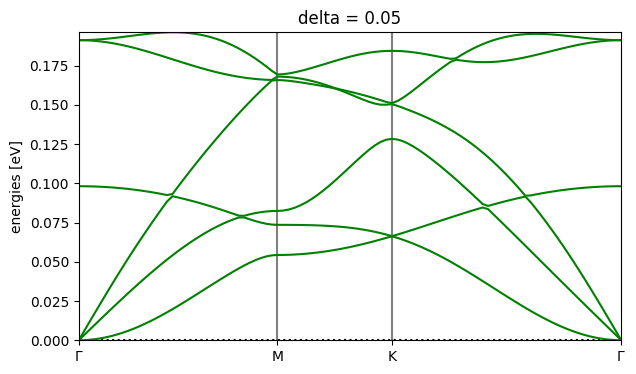

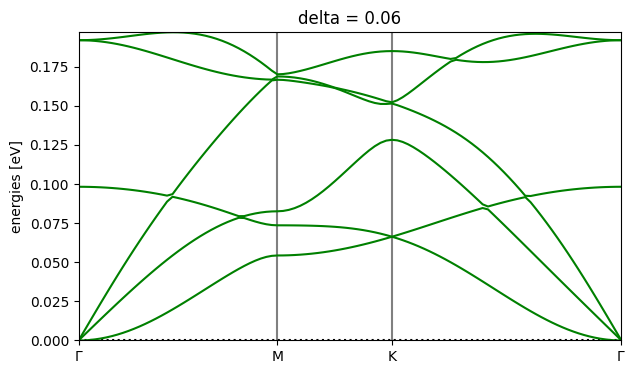

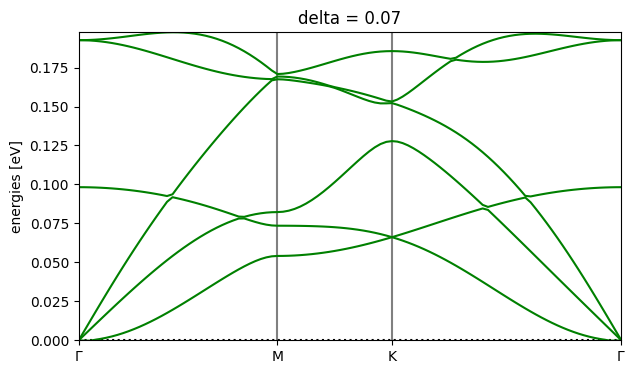

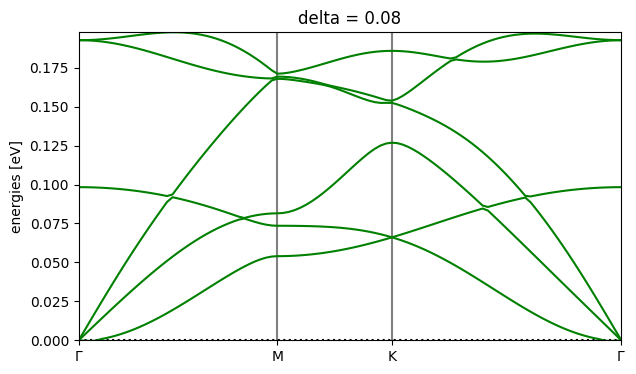

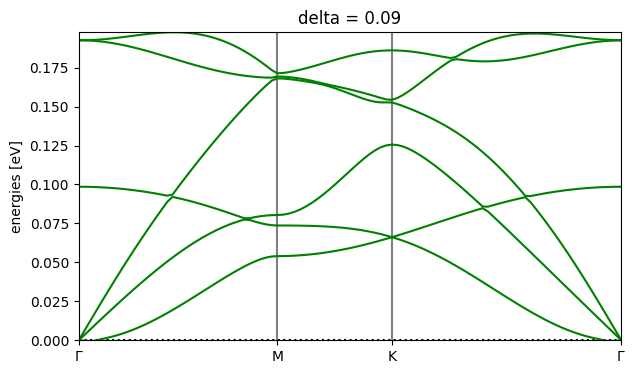

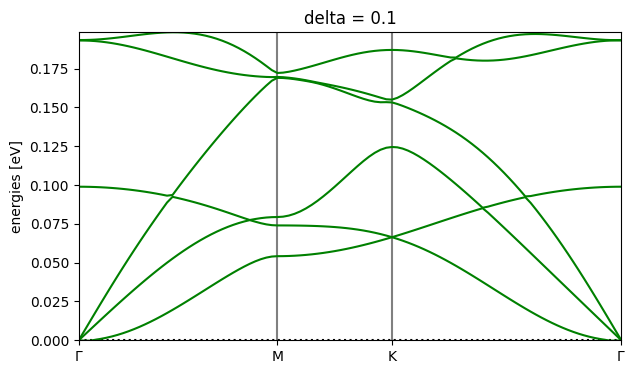

In [5]:
# hbar = 6.582119569e-16 * 1e12  # eV/THz
N = 8
for delta in np.arange(1, 11) * 0.01:
    start_time = datetime.now()
    # Phonon calculator
    calc = KIM(potential)
    calc.set_parameters(active_member_id=[[0], [0]])
    ph = Phonons(atoms, calc, supercell=(N, N, 1), delta=delta)
    ph.run()

    # Read forces and assemble the dynamical matrix
    ph.read(acoustic=True)
    ph.clean()

    path = atoms.cell.bandpath("GMKG", npoints=100)
    bs = ph.get_band_structure(path)
    # dos = ph.get_dos(kpts=(20, 20, 20)).sample_grid(npts=100, width=1e-3)
    end_time = datetime.now()
    print(f"delta = {delta}, Evaluation time:", end_time - start_time)

    # Plot the band structure and DOS:
    plt.figure(figsize=(7, 4))
    ax = plt.gca()
    ax.set_title(f"delta = {delta}")
    emax = np.max(bs.energies)
    bs.plot(ax=ax, emin=0.0, emax=emax)
plt.show()

I think we can use $N=8$ and $\delta=0.01$.